# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Loading crop and fertilizer data

In [3]:
fertilizer=pd.read_csv("datasets/Fertilizer Prediction.csv")

# Renaming Columns

In [4]:
fertilizer.columns  = fertilizer.columns.str.lower()
fertilizer.rename({'humidity ': 'humidity'}, axis = 1, inplace = True)

In [5]:
fertilizer.head()

,temparature,humidity,moisture,soil type,crop type,nitrogen,potassium,phosphorous,fertilizer name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
pd.options.display.float_format = '{:,.0f}'.format

In [8]:
fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   temparature      99 non-null     int64 
 1   humidity         99 non-null     int64 
 2   moisture         99 non-null     int64 
 3   soil type        99 non-null     object
 4   crop type        99 non-null     object
 5   nitrogen         99 non-null     int64 
 6   potassium        99 non-null     int64 
 7   phosphorous      99 non-null     int64 
 8   fertilizer name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [9]:
fertilizer.isna().sum()

temparature        0
humidity           0
moisture           0
soil type          0
crop type          0
nitrogen           0
potassium          0
phosphorous        0
fertilizer name    0
dtype: int64

In [10]:
fertilizer.duplicated().sum()

0

In [11]:
fertilizer.describe()

,temparature,humidity,moisture,nitrogen,potassium,phosphorous
count,99,99,99,99,99,99
mean,30,59,43,19,3,19
std,4,6,11,12,6,13
min,25,50,25,4,0,0
25%,28,54,34,10,0,9
50%,30,60,41,13,0,19
75%,33,64,50,24,8,30
max,38,72,65,42,19,42


# Fertilizer Prediction

<Axes: xlabel='fertilizer name', ylabel='count'>

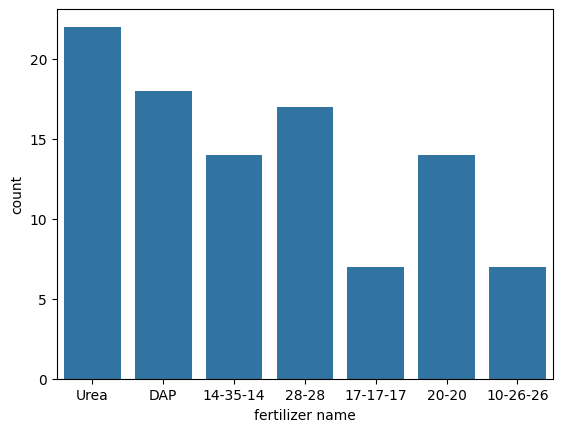

In [12]:
sns.countplot(data= fertilizer,x='fertilizer name')

In [13]:
fertilizer['soil type'].value_counts()

soil type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [14]:
fertilizer['crop type'].value_counts()

crop type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

In [15]:
soil_dict={
    'Loamy':1,
    'Sandy':2,
    'Clayey':3,
    'Black':4,
    'Red':5
}

crop_dict={
    'Sugarcane':1,
    'Cotton':2,
    'Millets':3,
    'Paddy':4,
    'Pulses':5,
    'Wheat':6,
    'Tobacco':7,
    'Barley':8,
    'Oil seeds':9,
    'Ground Nuts':10,
    'Maize':11
    
}

In [16]:
fertilizer['soil_num']=fertilizer['soil type'].map(soil_dict)
fertilizer['crop_num']=fertilizer['crop type'].map(crop_dict)

In [17]:
# Use the map function to replace values in the 'Category' column
fertilizer['soil_num'] = fertilizer['soil type'].map(soil_dict)

In [18]:
fertilizer.head()

,temparature,humidity,moisture,soil type,crop type,nitrogen,potassium,phosphorous,fertilizer name,soil_num,crop_num
0,26,52,38,Sandy,Maize,37,0,0,Urea,2,11
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP,1,1
2,34,65,62,Black,Cotton,7,9,30,14-35-14,4,2
3,32,62,34,Red,Tobacco,22,0,20,28-28,5,7
4,28,54,46,Clayey,Paddy,35,0,0,Urea,3,4


In [19]:
fertilizer=fertilizer.drop(['soil type','crop type'],axis=1)
fertilizer.head()

,temparature,humidity,moisture,nitrogen,potassium,phosphorous,fertilizer name,soil_num,crop_num
0,26,52,38,37,0,0,Urea,2,11
1,29,52,45,12,0,36,DAP,1,1
2,34,65,62,7,9,30,14-35-14,4,2
3,32,62,34,22,0,20,28-28,5,7
4,28,54,46,35,0,0,Urea,3,4


In [20]:
X=fertilizer.drop(['fertilizer name'],axis=1)
y=fertilizer['fertilizer name']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

In [22]:
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (79, 8)
Testing data shape: (20, 8)


## Decision Tree classifier

In [26]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("DecisionTreeClassifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

ecisionTreeClassifier Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (7).

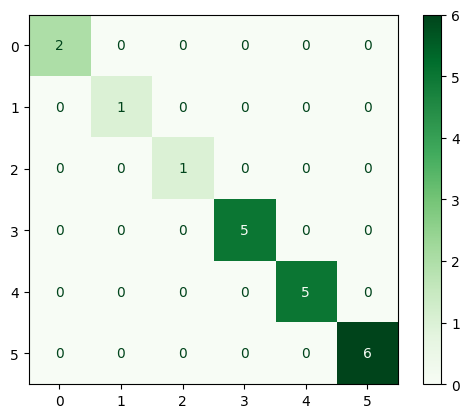

In [38]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Greens', xticks_rotation=90)
plt.title("Confusion Matrix - Fertilizer Prediction")
plt.show()

Save the Model

In [39]:
import joblib
joblib.dump(dt_classifier, 'fertilizer_recommendation_model.pkl')
print("\n✅ Model successfully saved as 'fertilizer_recommendation_model.pkl'")



✅ Model successfully saved as 'fertilizer_recommendation_model.pkl'


In [49]:
# Example Input (replace with real values)
sample_input = np.array([[30,60,42,21,0,18,2,3]])  # Example numbers
sample_pred = dt_classifier.predict(sample_input)
print(f"\nTop Predicted Fertilizer for given input: {sample_pred[0]}")



Top Predicted Fertilizer for given input: 28-28


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [50]:
import joblib
import numpy as np

# Load the saved model
model = joblib.load('fertilizer_recommendation_model.pkl')

# Example input in the same feature order as training data
#sample_input = np.array([[82, 25, 30, 80, 23, 3, 1,13]])  # adjust as per features
sample_input = np.array([[26,52,35,12,10,13,2,8]])  # adjust as per features
prediction = model.predict(sample_input)

print("Recommended Fertilizer:", prediction[0])


Recommended Fertilizer: 17-17-17


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
